<a href="https://colab.research.google.com/github/xuankai91/MResProject/blob/master/HDDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pymc
!pip install kabuki
!pip install hddm

     |████████████████████████████████| 389kB 3.5MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp36-cp36m-linux_x86_64.whl size=1275944 sha256=a08c1f7ab9c137b304cc55fe806b5023e0c7b74fa8ec9b67d18d7af4f80afe57
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc
     |████████████████████████████████| 51kB 1.9MB/s 
  Created wheel for kabuki: filename=kabuki-0.6.3-cp36-none-any.whl size=36532 sha256=e639d53275f28e2af6cf5df6960e32c63c850f4fc96ecd0f49ec17ac52dec57c
  Stored in directory: /root/.cache/pip/wheels/e7/b3/f0/f63833103cbccb322674dc63560e5aae52d46587ee402d8a7a
Successfully built kabuki
     |████████████████████████████████| 604kB 3.3MB/s 
  Created wheel for hddm: filename=HDDM-0.8.0-cp36-cp36m-linux_x86_64.whl size=558596 sha256=31f22a0c207e2ab59ff138c6c7d5e1ac0e01651f44fb6677dc9fd1fff76077b3
  Stored in directory: /root/.cache/pip/wheels/21/c3/c2/0f321d3c3838e33dedf21bebea05efb84e300f0e517d6008

In [27]:
import hddm
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

print(hddm.__version__)

from google.colab import drive
drive.mount('/content/gdrive')

0.8.0


In [28]:
#define number of samples to run
samples = 5000

In [29]:
url = 'https://raw.githubusercontent.com/xuankai91/MResProject/master/tofit_HDDM.csv'

data = hddm.load_csv(url)

data.head(5)

,subj_idx,stim,stim_PM,stim_noPM,rt,response,trialno,TBdist,TSdist,SBdist,Helpful
0,1,Rem,PM,noPM,0.74200,1,5,0.025194,0.083333,0.10853,7
1,1,Rem,PM,noPM,1.14910,0,6,0.025194,0.166670,0.14147,7
2,1,Rem,PM,noPM,0.56424,1,7,0.025194,0.250000,0.22481,7
3,1,Rem,PM,noPM,0.81039,1,8,0.025194,0.083333,0.10853,7
4,1,Rem,PM,noPM,0.54966,1,9,0.025194,0.083333,0.10853,7


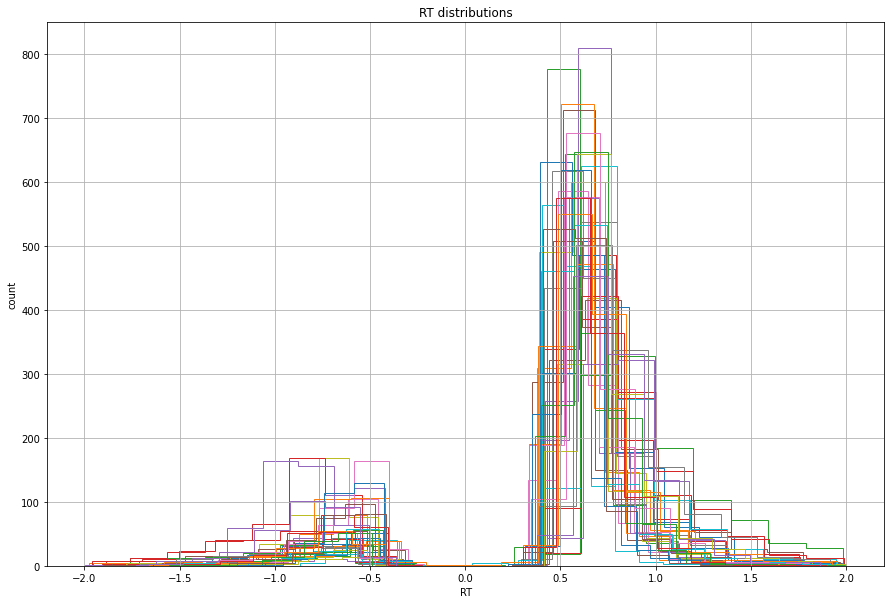

In [25]:
data = hddm.utils.flip_errors(data)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

#plt.savefig('./figures/hddm_RThist.png',dpi=200)

In [31]:
m_fixed = hddm.HDDM(data,p_outlier=.05)
m_fixed.find_starting_values()

m_fixed.sample(samples, burn=samples/10)

print(m_fixed.dic)
print(m_fixed.mc.BPIC)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 5001 of 5000 complete in 3443.7 sec-5485.809496683448
-5378.931133896474


In [33]:
type(m_fixed.gen_stats())

pandas.core.frame.DataFrame